<a href="https://colab.research.google.com/github/smomtahe/Regression/blob/main/Degree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the lobraries
import numpy as np
import pandas as pd
import tensorflow as tf
# for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline
from io import StringIO
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
#libraries for analytical model
from numpy import array
from numpy.linalg import inv
from numpy.linalg import qr
#libraries for selecting the best degree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#klearn.datasets is used to generate synthetic datasets for regressoion
import sklearn.datasets as dt
# for generating data from a dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
#import plotly_express as px
#plot surface
import os
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv("https://raw.githubusercontent.com/smomtahe/heightweight/main/heightweight.csv")


**Question1**
Generating synthetic data according to a polynomical function and add noise to the function to generate a scatter of N=20 points  

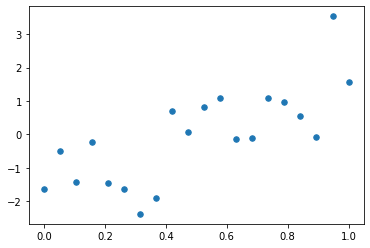

In [ ]:
#Creating the dataset
x = np.linspace(0,1,20)
noise = 1*np.random.uniform(size = 20)
y = 1*x + 2 * (x ** 2) + np.random.normal(-1, 1, 20)  #random noise #degree 2 polynomial

plt.scatter(x,y, s=30) #scatter of 20 points with size 30
y_noise = (y + noise).reshape(-1,1)

Analytical method (Norman Equation):
Calculate the cost  Jtrain(θ)=Jtrain(w,b)  over these two parameters by scanning over a range of values for both parameters. Plot the cost function landscape as a surface plot.

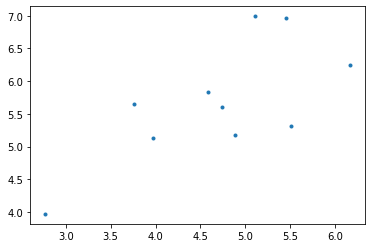

In [ ]:
# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 20)

# visualising data
plt.scatter(data[:10, 0], data[:10, 1], marker = '.')
plt.show()

# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))

split_factor = 0.5
split = int(split_factor * data.shape[0])

#X = data[:, :-1]
#y = data[:, -1].reshape((-1, 1))

x_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
x_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))

Text(0.5, 1.0, 'Fig.1')

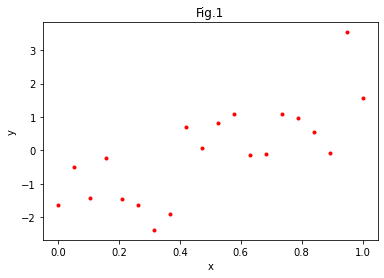

In [ ]:

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5) # split data to train and test
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y, "r.")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fig.1')


In [ ]:
def get_best_param(x, y):
    X_transpose = x.T
    best_params = inv(X_transpose.dot( x)).dot(X_transpose).dot(y)  # normal equation  # theta_best = (X.T * X)^(-1) * X.T * y
    return best_params # returns a list
    print(best_params )
#get_best_param(X, y)

In [ ]:
X_b = np.c_[np.ones((20, 1)), x] # set bias term to 1 for each sample
params = get_best_param(X_b, y)
# Display normal equation's result
print('Theta computed from the normal equations: \n',params);

Theta computed from the normal equations: 
 [-1.75386696  3.39349179]


[-1.75386696  5.03311663]


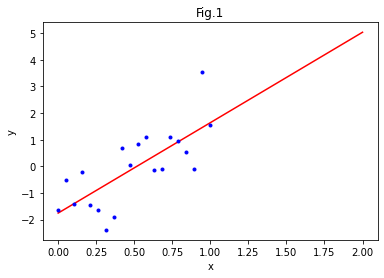

In [ ]:
# test prediction
test_X= np.array([[0], [2]])
test_X_b = np.c_[np.ones((2, 1)), test_X]
prediction = test_X_b.dot(params)
print(prediction)
plt.plot(test_X, prediction, "r")
plt.plot(x, y, "b.")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fig.1')
plt.show()

Linear Regression and Best Degree

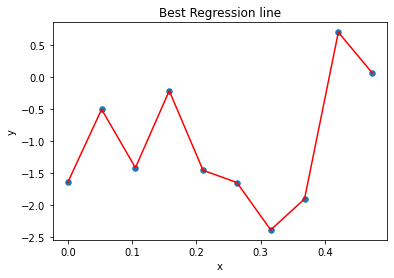

The best fit model has degree 6 with error 2.114164021942612


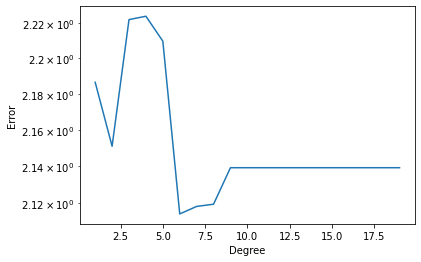

In [ ]:
## linear regression (the regression model fitted is the red straight line) ### in the next sections the best b and w are found by gradient descent method
from sklearn.linear_model import LinearRegression # it gives the best line
degrees = np.arange(1, 20) #select a degree between 1 to 10
rmses = [] #error
best_error=1e10 # variables for best (minimum) rmse
best_degree =0  # variables for best (minimum) degree
# Adding another axis by transforming the data
x_p_train= x[:split, np.newaxis]
y_p_train = y[:split, np.newaxis]
x_p_test= x[split:, np.newaxis]
y_p_test = y[split:, np.newaxis]
#using the linear regression model
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)     # Train features
    x_poly_train = poly_features.fit_transform(x_p_train)
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_p_train)
    x_poly_test = poly_features.fit_transform(x_p_test) # compare with test data

    poly_predict = poly_reg.predict(x_poly_train)
    poly_err = mean_squared_error(y_p_test, poly_predict)
    poly_error = np.sqrt(poly_err)
    rmses.append(poly_error)
    if best_error > poly_error: # Cross-validation of degree
        best_error = poly_error
        best_degree = deg
plt.scatter(x_p_train, y_p_train, s=30)
plt.plot(x_p_train, poly_predict, color='r')

plt.title('Best Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
figure = plt.figure() #plot
ax = figure.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_xlabel('Degree')
ax.set_ylabel('Error')
ax.set_yscale('log')
print('The best fit model has degree {} with error {}'.format(best_degree, best_error))
